In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.spatial.distance import cdist
!pip install kaleido

In [14]:
data = pd.read_csv('/Users/niloy74/UoB/Data Analytics and Predictive Modelling/report.csv')
data

,FullName,ClubName,AgeGroup,Position,FIFARating,MinutesPlayed,GAContribution,FantasyScore,MarketValue,TransferStatus
0,Erling Haaland,Manchester City,21 and under,Forward,88,2767,45,7.8,180000000,Retained
1,Bukayo Saka,Arsenal,21 and under,Midfielder,82,3183,26,5.3,120000000,Retained
2,Declan Rice,West Ham United,22-25,Midfielder,84,3272,7,3.1,110000000,Transferred
3,Mohamed Salah,Liverpool,30 and above,Forward,90,3290,32,6.3,110000000,Retained
4,Phil Foden,Manchester City,22-25,Midfielder,85,1832,18,4.4,110000000,Retained
...,...,...,...,...,...,...,...,...,...,...
571,Alex Gilbert,Brentford,21 and under,Forward,59,0,0,0.0,100000,Retained
572,Lewis Brunt,Leicester City,21 and under,Midfielder,55,22,0,1.0,100000,Retained
573,Tristan Crama,Brentford,21 and under,Defender,58,0,0,0.0,100000,Retained
574,Tawanda Maswanhise,Leicester City,21 and under,Midfielder,60,0,0,0.0,50000,Retained


In [94]:
dataC = pd.read_csv('/Users/niloy74/UoB/Data Analytics and Predictive Modelling/OPCLUSTER.csv')
dataC

,Unnamed: 0,FullName,ClubName,AgeGroup,Position,FIFARating,MinutesPlayed,GAContribution,FantasyScore,MarketValue,TransferStatus,Cluster,ID
0,1,Bukayo Saka,Arsenal,0,3,82,3183,26,5.3,120000000,Retained,0,120000000823183
1,2,Declan Rice,West Ham United,1,3,84,3272,7,3.1,110000000,Transferred,0,110000000843272
2,3,Mohamed Salah,Liverpool,3,1,90,3290,32,6.3,110000000,Retained,0,110000000903290
3,4,Phil Foden,Manchester City,1,3,85,1832,18,4.4,110000000,Retained,0,110000000851832
4,5,Jadon Sancho,Manchester United,1,3,84,1683,9,4.0,100000000,Transferred,0,100000000841683
...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,560,Will Dennis,AFC Bournemouth,0,2,58,0,0,0.0,200000,Transferred,2,200000580
389,571,Alex Gilbert,Brentford,0,1,59,0,0,0.0,100000,Retained,2,100000590
390,572,Lewis Brunt,Leicester City,0,3,55,22,0,1.0,100000,Retained,2,1000005522
391,573,Tristan Crama,Brentford,0,0,58,0,0,0.0,100000,Retained,2,100000580


In [16]:
descriptive_stats = data.describe()
descriptive_stats

,FIFARating,MinutesPlayed,GAContribution,FantasyScore,MarketValue
count,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,73.963542,1209.616319,3.171875,2.023438,2.048989e+07
std,8.168895,1095.128560,5.489276,1.478185,2.289049e+07
min,50.000000,0.000000,0.000000,0.000000,2.500000e+04
25%,70.000000,48.750000,0.000000,1.000000,3.000000e+06
50%,76.000000,1019.500000,1.000000,2.000000,1.500000e+07
75%,79.000000,2115.250000,4.000000,3.000000,2.800000e+07
max,91.000000,3420.000000,45.000000,9.000000,1.800000e+08


In [18]:
data_numeric = data[['FIFARating', 'MinutesPlayed', 'GAContribution', 'FantasyScore', 'MarketValue']]
data_numeric

,FIFARating,MinutesPlayed,GAContribution,FantasyScore,MarketValue
0,88,2767,45,7.8,180000000
1,82,3183,26,5.3,120000000
2,84,3272,7,3.1,110000000
3,90,3290,32,6.3,110000000
4,85,1832,18,4.4,110000000
...,...,...,...,...,...
571,59,0,0,0.0,100000
572,55,22,0,1.0,100000
573,58,0,0,0.0,100000
574,60,0,0,0.0,50000


In [20]:
descriptive_stats.loc['variance'] = data_numeric.var()
descriptive_stats.loc['skewness'] = data_numeric.skew()
descriptive_stats.loc['kurtosis'] = data_numeric.kurtosis()
descriptive_stats.loc['median'] = data_numeric.median()

In [22]:
descriptive_stats

,FIFARating,MinutesPlayed,GAContribution,FantasyScore,MarketValue
count,576.000000,5.760000e+02,576.000000,576.000000,5.760000e+02
mean,73.963542,1.209616e+03,3.171875,2.023438,2.048989e+07
std,8.168895,1.095129e+03,5.489276,1.478185,2.289049e+07
min,50.000000,0.000000e+00,0.000000,0.000000,2.500000e+04
25%,70.000000,4.875000e+01,0.000000,1.000000,3.000000e+06
50%,76.000000,1.019500e+03,1.000000,2.000000,1.500000e+07
75%,79.000000,2.115250e+03,4.000000,3.000000,2.800000e+07
max,91.000000,3.420000e+03,45.000000,9.000000,1.800000e+08
variance,66.730842,1.199307e+06,30.132147,2.185032,5.239747e+14
skewness,-0.705796,4.409102e-01,2.979275,0.572954,2.065547e+00


In [26]:
descriptive_stats.to_excel('/Users/niloy74/UoB/Data Analytics and Predictive Modelling/report_descriptive_statistics_final.xlsx')

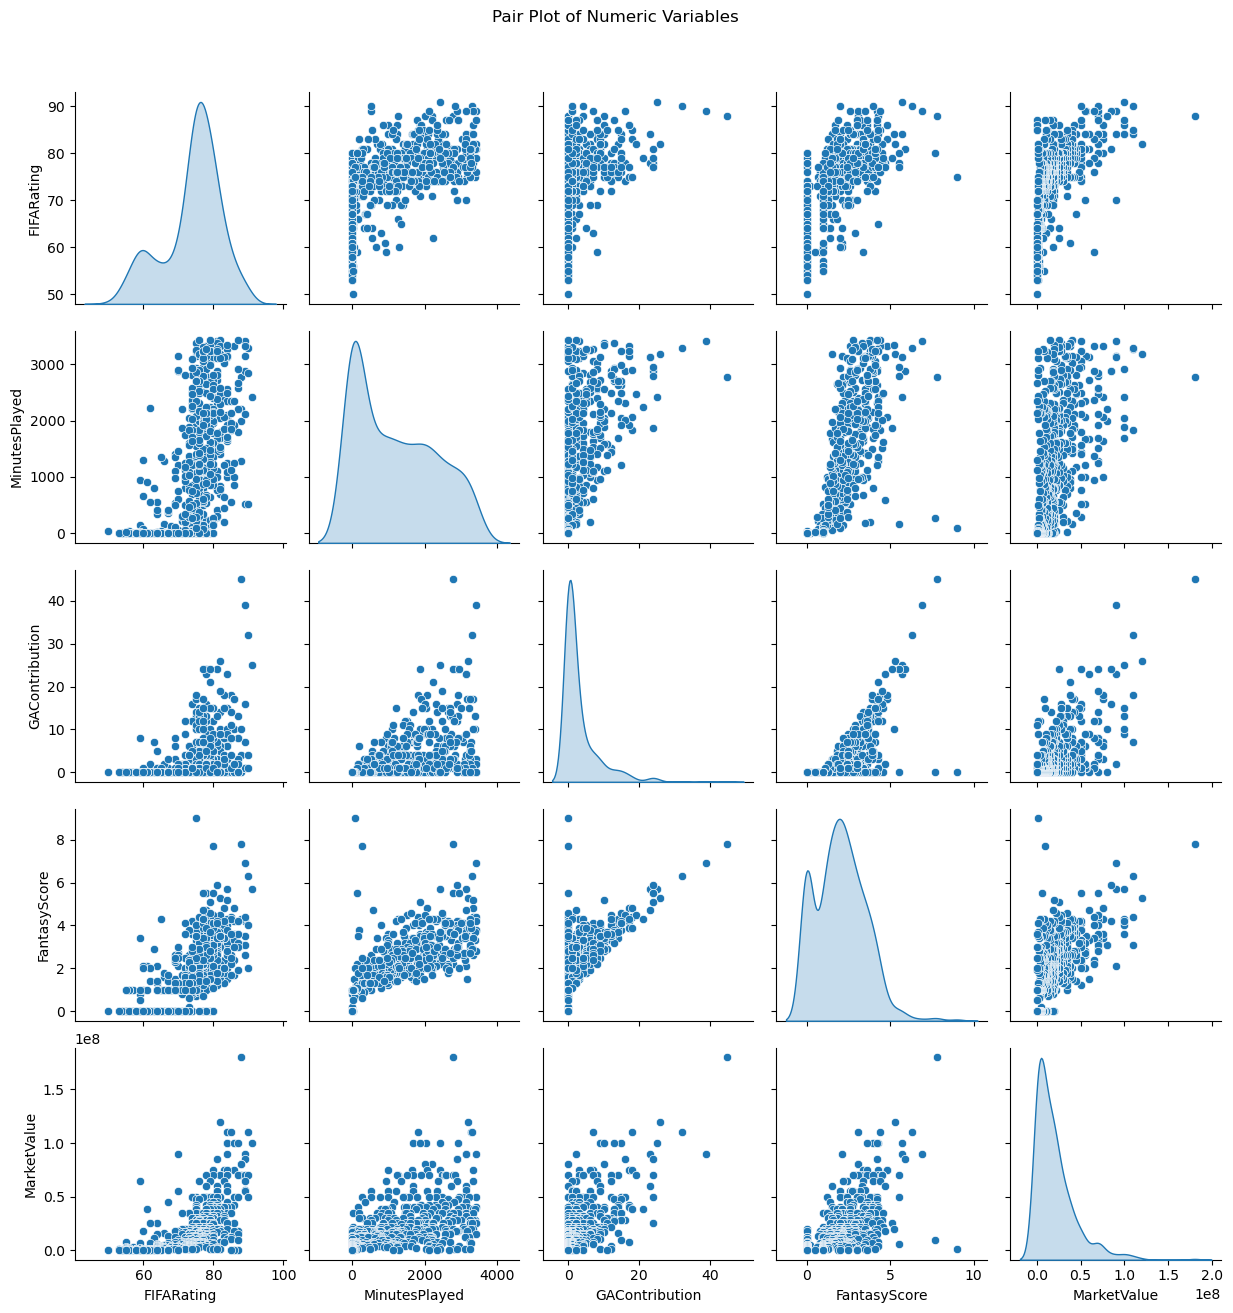

In [28]:
sns.pairplot(data, diag_kind='kde')
plt.suptitle('Pair Plot of Numeric Variables', y=1.05)
plt.savefig("Pairplot.png", format="png", bbox_inches="tight")
plt.show()

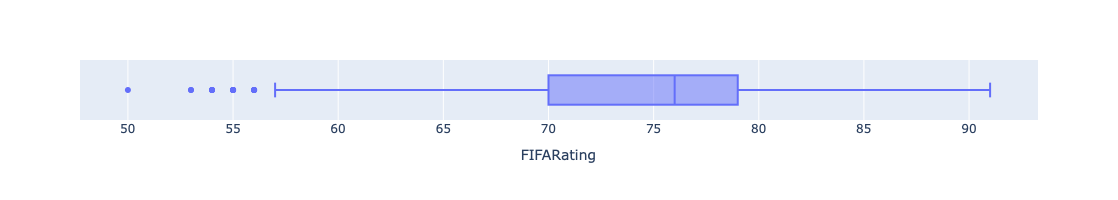

In [46]:
fig = px.box(data, x="FIFARating")
fig.update_traces(quartilemethod="exclusive")
fig.update_layout(width=1000, height=200)
fig.write_image("FIFA Rating Boxplot.png", format="png")
fig.show()

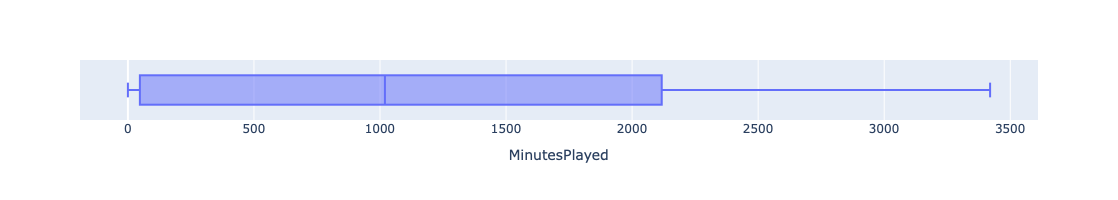

In [48]:
fig = px.box(data, x="MinutesPlayed")
fig.update_traces(quartilemethod="exclusive")
fig.update_layout(width=1000, height=200)
fig.write_image("Minutes Played Boxplot.png", format="png")
fig.show()

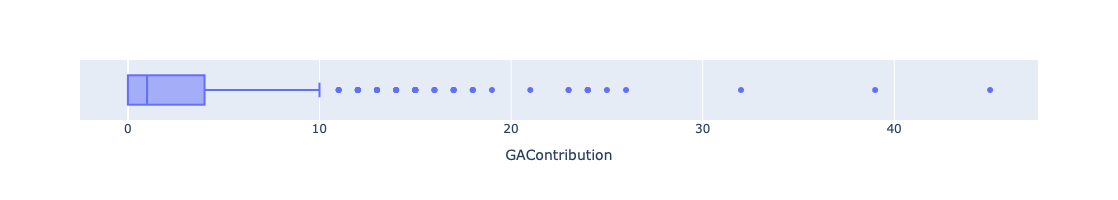

In [50]:
fig = px.box(data, x="GAContribution")
fig.update_traces(quartilemethod="exclusive")
fig.update_layout(width=1000, height=200)
fig.write_image("GA Contribution Boxplot.png", format="png")
fig.show()

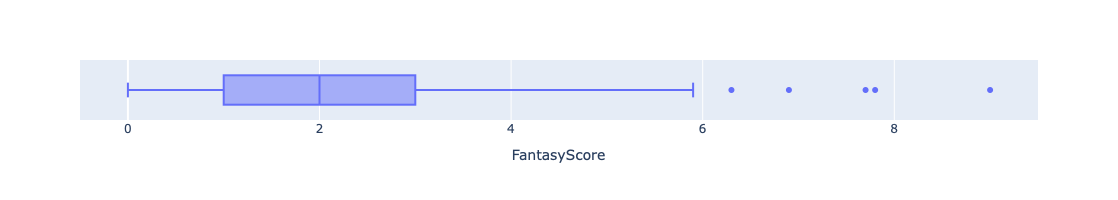

In [54]:
fig = px.box(data, x="FantasyScore")
fig.update_traces(quartilemethod="exclusive")
fig.update_layout(width=1000, height=200)
fig.write_image("Fantasy Score Boxplot.png", format="png")
fig.show()

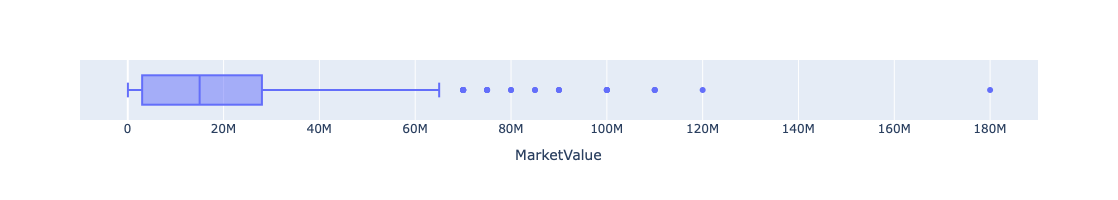

In [56]:
fig = px.box(data, x="MarketValue")
fig.update_traces(quartilemethod="exclusive")
fig.update_layout(width=1000, height=200)
fig.write_image("Market Value Boxplot.png", format="png")
fig.show()

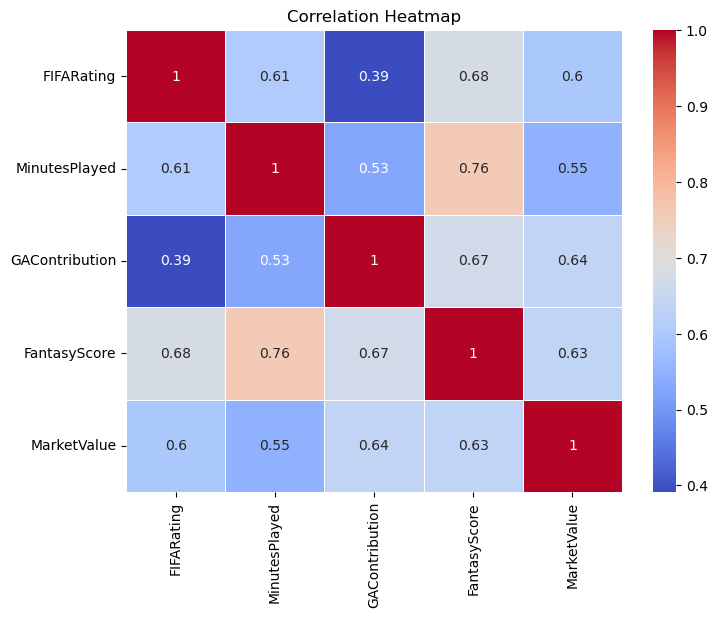

In [16]:
correlation_matrix = data_numeric.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.savefig("Correlation Heatmap.png", format="png", bbox_inches="tight")
plt.show()

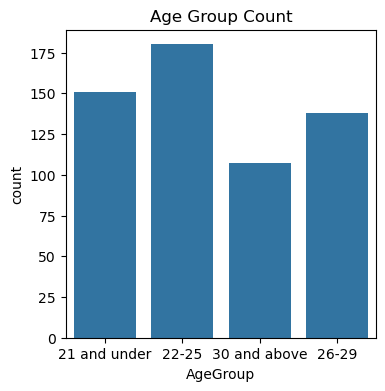

In [66]:
plt.figure(figsize=(4, 4))
sns.countplot(x='AgeGroup', data=data)
plt.title('Age Group Count')
plt.savefig("Age Group Bar Chart.png", format="png", bbox_inches="tight")
plt.show()

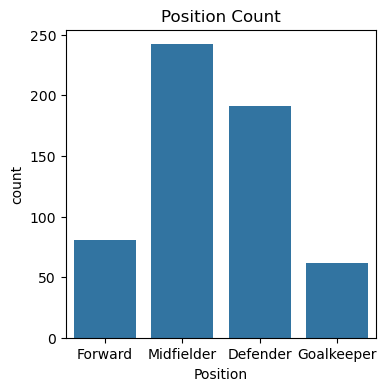

In [70]:
plt.figure(figsize=(4, 4))
sns.countplot(x='Position', data=data)
plt.title('Position Count')
plt.savefig("Position Bar Chart.png", format="png", bbox_inches="tight")
plt.show()

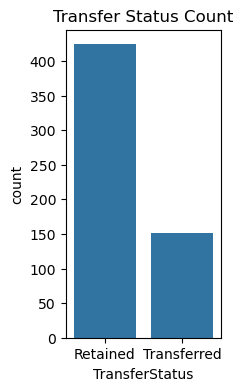

In [78]:
plt.figure(figsize=(2, 4))
sns.countplot(x='TransferStatus', data=data)
plt.title('Transfer Status Count')
plt.savefig("Transfer Status Bar Chart.png", format="png", bbox_inches="tight")
plt.show()

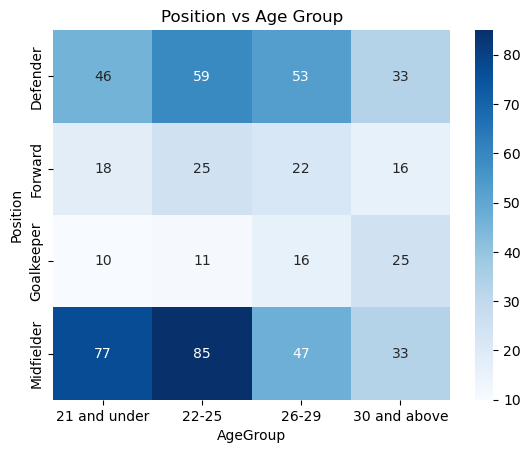

In [20]:
heatmap_data = pd.crosstab(data['Position'], data['AgeGroup'])

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues')
plt.title('Position vs Age Group')
plt.savefig("Position vs Age Group.png", format="png", bbox_inches="tight")
plt.show()

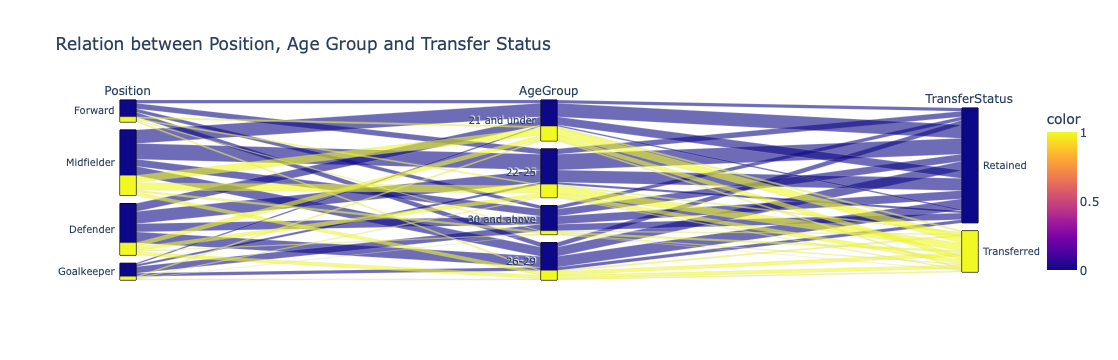

In [21]:
fig = px.parallel_categories(data, dimensions=['Position', 'AgeGroup', 'TransferStatus'], color=data['TransferStatus'].astype('category').cat.codes, title="Relation between Position, Age Group and Transfer Status")
fig.write_image("Relation between Position, Age Group and Transfer Status.png", format="png", width=1000, height=600, scale=1)
fig.show()

In [82]:
players_to_filter = [
    'Erling Haaland',
    'Kevin De Bruyne',
    'Andrew Robertson',
    'Aaron Ramsdale',
    'Kieffer Moore',
    'Marcus Tavernier',
    'Romeo Lavia',
    'Jason Steele',
]

data_dissimilarity = data[data['FullName'].isin(players_to_filter)]
data_dissimilarity

,FullName,ClubName,AgeGroup,Position,FIFARating,MinutesPlayed,GAContribution,FantasyScore,MarketValue,TransferStatus
0,Erling Haaland,Manchester City,21 and under,Forward,88,2767,45,7.8,180000000,Retained
7,Kevin De Bruyne,Manchester City,30 and above,Midfielder,91,2413,25,5.7,100000000,Retained
28,Andrew Robertson,Liverpool,26-29,Defender,87,2579,8,3.6,70000000,Retained
81,Aaron Ramsdale,Arsenal,22-25,Goalkeeper,82,3420,0,3.8,40000000,Retained
179,Romeo Lavia,Southampton,21 and under,Defender,62,2219,2,2.0,25000000,Retained
263,Marcus Tavernier,AFC Bournemouth,22-25,Midfielder,72,1740,9,4.1,17000000,Retained
401,Kieffer Moore,AFC Bournemouth,26-29,Forward,73,1269,4,2.1,5000000,Transferred
412,Jason Steele,Brighton & Hove Albion,30 and above,Goalkeeper,65,1350,1,4.3,4000000,Retained


In [84]:
data_dissimilarity_numeric = data_dissimilarity.drop(columns = ['FullName', 'ClubName', 'AgeGroup', 'Position', 'TransferStatus'])
data_dissimilarity_numeric

,FIFARating,MinutesPlayed,GAContribution,FantasyScore,MarketValue
0,88,2767,45,7.8,180000000
7,91,2413,25,5.7,100000000
28,87,2579,8,3.6,70000000
81,82,3420,0,3.8,40000000
179,62,2219,2,2.0,25000000
263,72,1740,9,4.1,17000000
401,73,1269,4,2.1,5000000
412,65,1350,1,4.3,4000000


In [86]:
data_dissimilarity_categorical = data_dissimilarity.drop(columns = ['FullName', 'ClubName', 'TransferStatus', 'FIFARating', 
                                                                    'MinutesPlayed', 'GAContribution', 'FantasyScore', 'MarketValue'])
data_dissimilarity_categorical

,AgeGroup,Position
0,21 and under,Forward
7,30 and above,Midfielder
28,26-29,Defender
81,22-25,Goalkeeper
179,21 and under,Defender
263,22-25,Midfielder
401,26-29,Forward
412,30 and above,Goalkeeper


In [88]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from scipy.spatial.distance import cdist
import numpy as np

def mixed_dissimilarity_matrix(numeric_data, categorical_data, numeric_weight=1, categorical_weight=1):
    scaler = MinMaxScaler()
    normalized_numeric_data = scaler.fit_transform(numeric_data)

    encoder = OneHotEncoder(sparse_output=False)
    one_hot_categorical_data = encoder.fit_transform(categorical_data)

    numeric_distance_matrix = cdist(normalized_numeric_data, normalized_numeric_data, metric='cosine')
    categorical_distance_matrix = cdist(one_hot_categorical_data, one_hot_categorical_data, metric='jaccard')

    mixed_matrix = (numeric_weight * numeric_distance_matrix) + (categorical_weight * categorical_distance_matrix)

    return mixed_matrix

dissimilarity_matrix = mixed_dissimilarity_matrix(data_dissimilarity_numeric, data_dissimilarity_categorical, 
                                                  numeric_weight=1, categorical_weight=1)
print("Mixed Dissimilarity Matrix:")
print(dissimilarity_matrix)


Mixed Dissimilarity Matrix:
[[0.00000000e+00 1.04210112e+00 1.16199416e+00 1.30454118e+00
  1.17150621e+00 1.09558682e+00 1.10718813e+00 1.36997957e+00]
 [1.04210112e+00 0.00000000e+00 1.05844084e+00 1.20460361e+00
  1.53384208e+00 7.16539557e-01 1.25072688e+00 1.04410576e+00]
 [1.16199416e+00 1.05844084e+00 1.11022302e-16 1.07884101e+00
  1.06718831e+00 1.13193049e+00 8.98517576e-01 1.53133903e+00]
 [1.30454118e+00 1.20460361e+00 1.07884101e+00 0.00000000e+00
  1.20182014e+00 8.81831268e-01 1.45885894e+00 1.22342560e+00]
 [1.17150621e+00 1.53384208e+00 1.06718831e+00 1.20182014e+00
  0.00000000e+00 1.57524009e+00 1.97418031e+00 1.90699479e+00]
 [1.09558682e+00 7.16539557e-01 1.13193049e+00 8.81831268e-01
  1.57524009e+00 1.11022302e-16 1.32076867e+00 1.20528444e+00]
 [1.10718813e+00 1.25072688e+00 8.98517576e-01 1.45885894e+00
  1.97418031e+00 1.32076867e+00 0.00000000e+00 1.70106467e+00]
 [1.36997957e+00 1.04410576e+00 1.53133903e+00 1.22342560e+00
  1.90699479e+00 1.20528444e+00 1.7

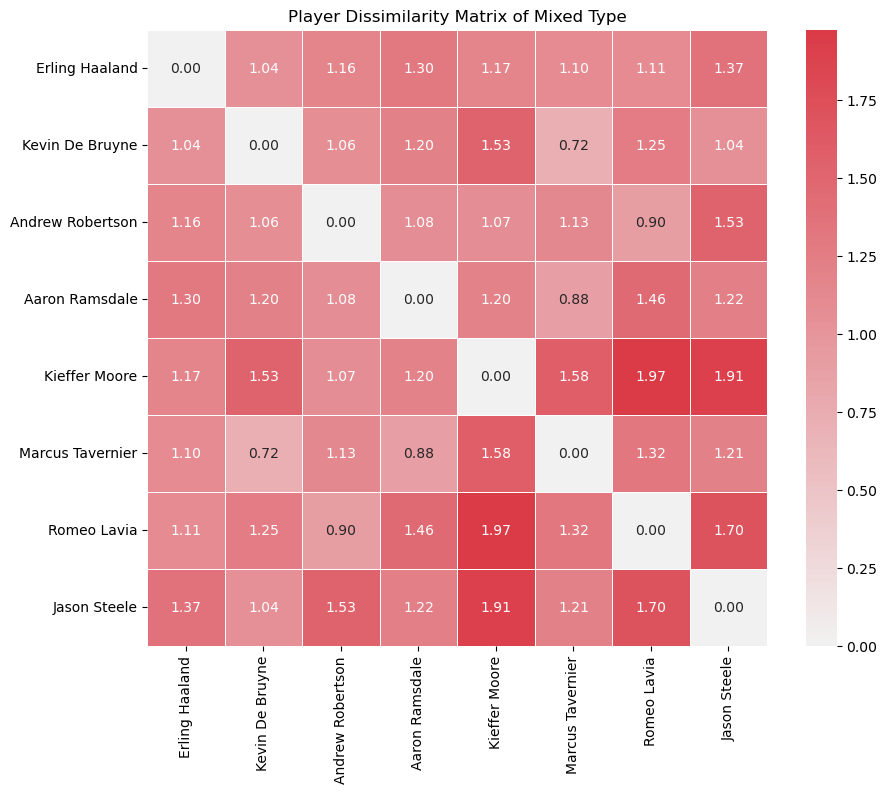

In [92]:
data_dissimilarity_final = pd.DataFrame(dissimilarity_matrix, columns=players_to_filter, index=players_to_filter)

plt.figure(figsize=(10, 8))
sns.heatmap(data_dissimilarity_final, annot=True, cmap=sns.diverging_palette(120, 10, as_cmap=True), fmt=".2f", linewidths=0.5, center=0)
plt.title("Player Dissimilarity Matrix of Mixed Type")
plt.savefig("Dissimilarity Matrix Heatmap.png", format="png", bbox_inches="tight")
plt.show()

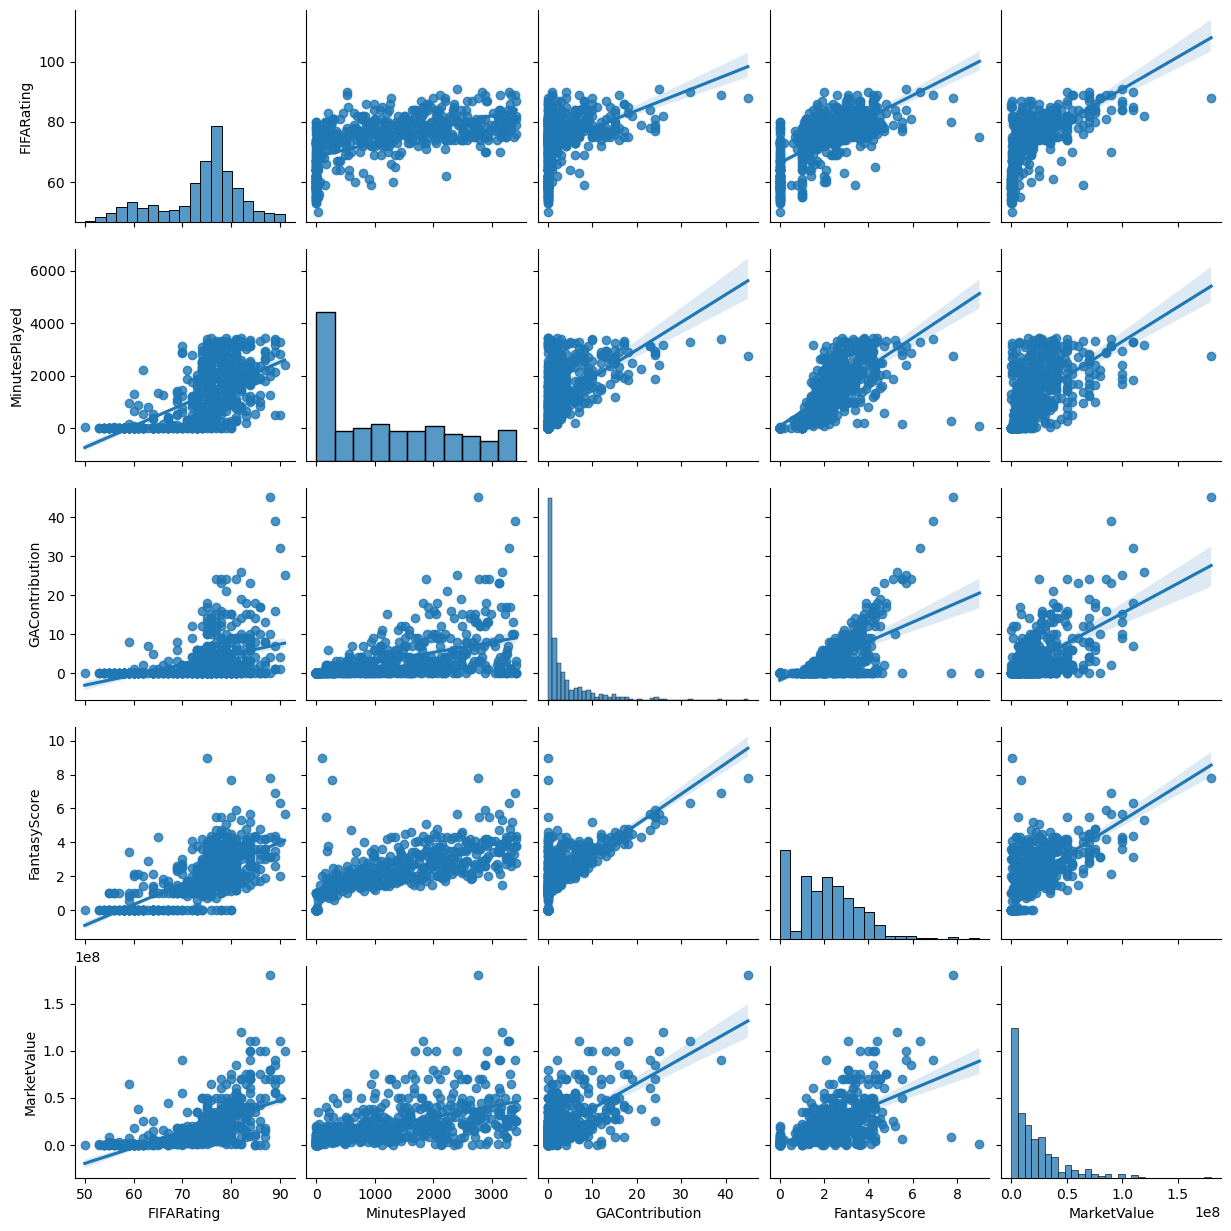

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Specify your own x and y variables
x_vars = ['FIFARating', 'MinutesPlayed', 'GAContribution', 'FantasyScore']  # List of columns for x variables
y_vars = ['MarketValue']      # List of columns for y variables

# Filter the DataFrame to only include the selected variables
selected_columns = x_vars + y_vars
df_selected = data[selected_columns]

# Generate the matrix plot with regression lines to show trends
sns.pairplot(df_selected, kind='reg')

# Show the plot
plt.show()
